In [6]:
import csv
import airway_analysis.bronchipy.io.branchio as brio
from airway_analysis.bronchipy.calc.measure_airways import calc_pi10
from airway_analysis.bronchipy.calc.summary_stats import param_by_gen, agg_param, total_count

In [7]:
tree = brio.load_pickle_tree("../temp_test_files/Analysis/airway_tree.pickle")

INFO:root:Pi10 R2 value is: 0.9439402430182865
INFO:root:Slope [0.24051721] and intercept 2.531364587930363


..\temp_test_files\pi10\pi10_graph.jpg


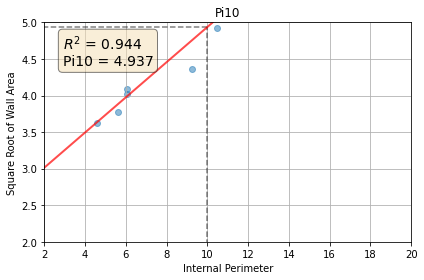

In [8]:
# Calculate bronchial parameters
pi10_tree = tree[(tree.generation > 1) & (tree.generation <= 6)]
pi10 = calc_pi10(
    pi10_tree["wall_global_area"],
    pi10_tree["inner_radius"],
    name="pi10_graph",
    save_dir="../temp_test_files/pi10",
    plot=True
)

In [9]:
wap3 = param_by_gen(tree, 3, "wall_global_area_perc")

In [10]:
wap3 = param_by_gen(tree, 3, "wall_global_area_perc")
la3 = param_by_gen(tree, 3, "inner_global_area")
wt3 = param_by_gen(tree, 3, "wall_global_thickness")
wap35 = agg_param(tree, [3, 5], "wall_global_area_perc")
la35 = agg_param(tree, [3, 5], "inner_global_area")
wt35 = agg_param(tree, [3, 5], "wall_global_thickness")
tcount = total_count(tree)

In [11]:
bp_head = ["id", "bp_wap3", "bp_wap35", "bp_la3", "bp_la35", "bp_wt3", "bp_wt35", "bp_tcount", "bp_pi10"]
bp_list = [wap3, wap35, la3, la35, wt3, wt35, tcount, pi10]
with open(f"../temp_test_files/bp_summary.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(bp_head)
    writer.writerow(bp_list)